# BCB 546_Python Assignment_HW

In [62]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

# FUNCTIONS


## Task 1
Dr.X followed the following steps
1. Using Def command to define this function (get_sequence_from_file), and to extract sequences from one file using a list from another file
2. Next he created a loop and used the parse command to create a record of the sequences in the following steps 
     sequence_data_dict = {} - To create a tuple for the new sequences extracted and use {} to create a dictionary
     record.description.split - create a record of each sequence a store in the vraiable called description
     He then created an object species names to add names to each of the sequences
     
- I got the idea from https://www.geeksforgeeks.org/python-def-keyword/ and https://biopython.org/docs/1.75/api/Bio.SeqIO.html
     

In [63]:
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)

In [64]:
get_sequences_from_file("penguins_cytb.fasta.txt")

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA'),
 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA'),
 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA'),
 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA'),
 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG'),
 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC...TAG'),
 'Spheniscus demersus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA'),
 'Spheniscus humboldti': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAAC

## Task 2


## The string translate function - to translate string of nucleotide to string of aa
1. Arguments: string_nucleotides
Create a loop to that reads the codons starting from nuclotide 0 to the 3rd, to take every three nuclotide as a codon
The loop should stop if it finds a stop codon and 
2. Return: amino acid string the (aa_seq_string object)
3. Output: amino acid translated list
    - I got the idea from https://www.geeksforgeeks.org/dna-protein-python-3/ and http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc25

In [65]:
from Bio.Data import CodonTable

In [66]:
def translate_dna(string_nucleotides):
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] 
    aa = ""
    aa_seq_string = ""
    for i in range(0,len(string_nucleotides),3): 
        codon = string_nucleotides[i:i+3] 
        if codon not in mito_table.stop_codons: 
            aa = mito_table.forward_table[codon] 
            aa_seq_string += aa 
        else: 
            return(aa_seq_string)

In [67]:
print(CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"])

Table 2 Vertebrate Mitochondrial, SGC1

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L   | TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA Stop| A
A | ATG M(s)| ACG T   | AAG K   | AGG Stop| G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G   

### To confirm the code function
1. Select an entry in the data to translate, eg translate Eudyptes chrysocome in penguins_cytb.fasta.txt

In [68]:
penguin_seq = get_sequences_from_file("penguins_cytb.fasta.txt")["Eudyptes chrysocome"] 
aa_seq = translate_dna(penguin_seq)
aa_seq

'MAPNLRKSHPLLKTINNSLIDLPTPSNISAWWNFGSLLGICLATQILTGLLLAAHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGLYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWAWGGFSVDNPTLTRFFTLHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFILLLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMTFRPLSQLLFWTLVANLTILTWIGSQPVEHPFIIIGQLASLTYFTILLILFPLIGTLENKMLNH'

## Task 3

### Own function 
1. The function defined here is translate_dna_1
2. Description: Translates nucleotides into amino acids, excluding stop codons
3. Arguments: penguins
4. Output: produce a list of translated amino acid sequence

- I got the idea from https://biopython.org/wiki/ProtParam and https://biopython-tutorial.readthedocs.io/en/latest/notebooks/03%20-%20Sequence%20Objects.html

In [69]:
from Bio.Seq import Seq
def translate_dna_1(dna_sequence):
    penguin_seq = Seq(dna_sequence)
    aa_seq = penguin_seq.translate(table = 2, to_stop = True)
    return aa_seq

In [70]:
translate_dna_1(str(penguin_seq))

Seq('MAPNLRKSHPLLKTINNSLIDLPTPSNISAWWNFGSLLGICLATQILTGLLLAA...LNH')

In [71]:
translate_dna_1(str(penguin_seq)) == aa_seq

True

## Task 4

### Function for mw of each each amino acid sequence
1. The functions used here are molecular weight and protein analysis
2. Description: to check the molecular weight of the aa_seq
3. The argument is aa_seq
4. The output is the molecular weight of the amino acid in this file

- I got the idea from https://biopython.org/docs/1.75/api/Bio.Seq.html and https://biopython.org/wiki/ProtParam

In [72]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.SeqUtils import molecular_weight
def compute_molecular_weight(aa_seq): 
    analysis_seq = ProteinAnalysis(aa_seq)
    weight = analysis_seq.molecular_weight()
    return(weight)


In [73]:
compute_molecular_weight(aa_seq)

42475.5753

## Task 5

### The GC-content of each DNA sequence
1. The function used here is gc_content
2. Description: To omputes percent G and C nucleotides from nucleotide sequence
3. Arguments: DNA sequence
    - count all the items that are not any of the DNA nucleotides, ie ATGC and then remove them. the bases_na is the object created of these items
4. Return: the object returned is the gc_cont
5. Output: gc_percent

    - I got the ideas from https://biopython.org/docs/1.75/api/Bio.SeqUtils.ProtParam.html

In [74]:
def gc_content(dna_sequence):
    bases_na = dna_sequence.count('n')+dna_sequence.count('N') 
    gc_cont = float(dna_sequence.count('C')+dna_sequence.count('G'))*100.0/(len(dna_sequence)-bases_na) 
    return gc_cont

In [75]:
gc_content(penguin_seq)

51.181102362204726

# Main

In [76]:
penguins_seqs = get_sequences_from_file("penguins_cytb.fasta.txt") 
penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguins_df.species)

In [77]:
penguins_df

,species,mass
0,Aptenodytes forsteri,28.00
1,Aptenodytes patagonicus,13.40
2,Eudyptes chrysocome,2.80
3,Eudyptes chrysolophus,4.50
4,Eudyptes sclateri,4.25
5,Eudyptula minor,1.60
6,Pygoscelis adeliae,4.60
7,Pygoscelis antarctica,4.10
8,Pygoscelis papua,6.10
9,Spheniscus demersus,3.20


## Task 6
1. Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content with 'NaN' to indicate the columns are empty

In [78]:
penguins_df["molecular weight"] = "NaN" 
penguins_df["GC content"] = "NaN" 
penguins_df

,species,mass,molecular weight,GC content
0,Aptenodytes forsteri,28.00,NaN,NaN
1,Aptenodytes patagonicus,13.40,NaN,NaN
2,Eudyptes chrysocome,2.80,NaN,NaN
3,Eudyptes chrysolophus,4.50,NaN,NaN
4,Eudyptes sclateri,4.25,NaN,NaN
5,Eudyptula minor,1.60,NaN,NaN
6,Pygoscelis adeliae,4.60,NaN,NaN
7,Pygoscelis antarctica,4.10,NaN,NaN
8,Pygoscelis papua,6.10,NaN,NaN
9,Spheniscus demersus,3.20,NaN,NaN


## Task 7


### details
- Create a loop to enter the GC percentage and MW of the amino acids in the created columns respectively. Each entry should now have the GC content and MW displayed

In [115]:
row = 0
for key, value in penguins_seqs.items():
    trans_all = translate_dna_1(str(value))
    molecular_weight = compute_molecular_weight(aa_seq)
    GC_content = gc_content(str(value))
    penguins_df.at[row, 'GC content'] = GC_content 
    penguins_df.at[row, 'molecular weight'] = molecular_weight
    row +=1 
       

In [116]:
penguins_df 

,species,mass,molecular weight,GC content
0,Aptenodytes forsteri,28.00,42475.5753,48.381452
1,Aptenodytes patagonicus,13.40,42475.5753,49.693788
2,Eudyptes chrysocome,2.80,42475.5753,51.181102
3,Eudyptes chrysolophus,4.50,42475.5753,50.918635
4,Eudyptes sclateri,4.25,42475.5753,50.831146
5,Eudyptula minor,1.60,42475.5753,49.256343
6,Pygoscelis adeliae,4.60,42475.5753,49.081365
7,Pygoscelis antarctica,4.10,42475.5753,47.769029
8,Pygoscelis papua,6.10,42475.5753,47.156605
9,Spheniscus demersus,3.20,42475.5753,48.293963


## Task 8

###  Bar-chart of the mass with the x-axes labeled with species names

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

[Text(0, 0, 'Aptenodytes forsteri'),
 Text(1, 0, 'Aptenodytes patagonicus'),
 Text(2, 0, 'Eudyptes chrysocome'),
 Text(3, 0, 'Eudyptes chrysolophus'),
 Text(4, 0, 'Eudyptes sclateri'),
 Text(5, 0, 'Eudyptula minor'),
 Text(6, 0, 'Pygoscelis adeliae'),
 Text(7, 0, 'Pygoscelis antarctica'),
 Text(8, 0, 'Pygoscelis papua'),
 Text(9, 0, 'Spheniscus demersus'),
 Text(10, 0, 'Spheniscus humboldti'),
 Text(11, 0, 'Spheniscus magellanicus')]

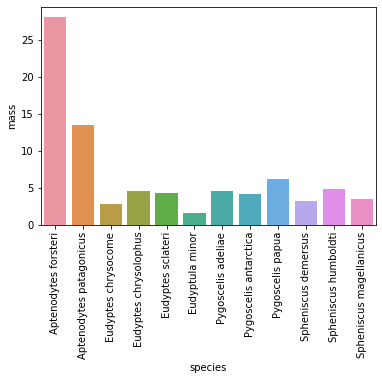

In [118]:
bar_chart = sns.barplot(x="species", y="mass",data=penguins_df,) 
bar_chart.set_xticklabels(labels = penguins_df.species, rotation= 90)

1. The smallest penguin species - Eudyptula minor
2.  The geographical range of this species - Eudyptula minor known as little penguin is found on the coastlines of southern Australia and New Zealand

## Task 9

### Visualization of the molecular weight (y-axis) as a function of GC-content (x-axis)

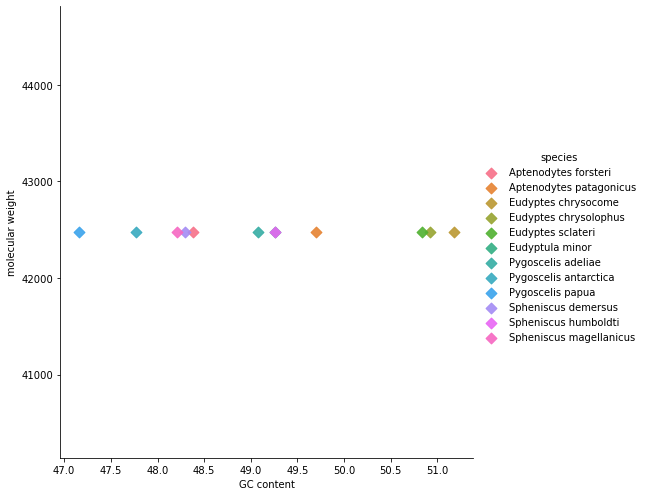

In [108]:
sns.lmplot(x="GC content", y="molecular weight", data=penguins_df, fit_reg=False, height=7, aspect=1, scatter_kws={'alpha':0.9,"s": 60}, 
           hue='species', markers='D')

## Task 10

### Create new DataFrame to a file called "penguins_mass_cytb.csv"

In [117]:
penguins_df.to_csv('penguins_mass_cytb.csv', index=False)
penguins = pd.read_csv("penguins_mass_cytb.csv")
penguins

,species,mass,molecular weight,GC content
0,Aptenodytes forsteri,28.00,42475.5753,48.381452
1,Aptenodytes patagonicus,13.40,42475.5753,49.693788
2,Eudyptes chrysocome,2.80,42475.5753,51.181102
3,Eudyptes chrysolophus,4.50,42475.5753,50.918635
4,Eudyptes sclateri,4.25,42475.5753,50.831146
5,Eudyptula minor,1.60,42475.5753,49.256343
6,Pygoscelis adeliae,4.60,42475.5753,49.081365
7,Pygoscelis antarctica,4.10,42475.5753,47.769029
8,Pygoscelis papua,6.10,42475.5753,47.156605
9,Spheniscus demersus,3.20,42475.5753,48.293963


## Task 11

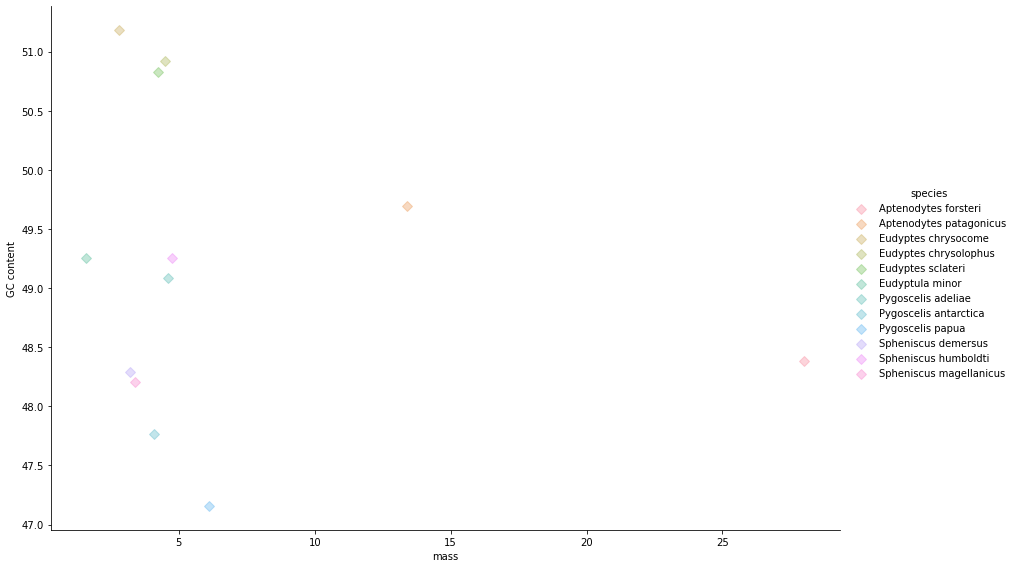

In [122]:
sns.lmplot(x="mass", y="GC content", data=penguins_df, 
           fit_reg=False, height=8, aspect=1.5, scatter_kws={'alpha':0.3,"s": 50}, 
           hue='species', markers='D')